![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math

In [2]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [2]:
#exploring the data
data=pd.read_csv('kc_house_data.csv')
selected_columns = [
    'id', 'price', 'view', 'bedrooms', 'bathrooms', 
    'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
    'condition', 'grade', 'yr_built']
data= data[selected_columns]
data.head(5)

,id,price,view,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,0.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,0.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,0.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,0.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,0.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [3]:
#summary of statistics for the numerical columns 
data.describe()

,id,price,view,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21534.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,0.233863,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.765686,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,0.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,0.000000,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,4.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [4]:
#Concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   view         21534 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  float64
 9   condition    21597 non-null  int64  
 10  grade        21597 non-null  int64  
 11  yr_built     21597 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


In [5]:
#checking for missing (null or NaN) values in each column
data.isna().sum()

id                0
price             0
view             63
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [6]:
#Handling Missing Data
data_cleaned = data.dropna()
data_cleaned.isnull().sum()

id             0
price          0
view           0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [7]:
data_cleaned.head(3)

,id,price,view,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,0.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,0.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,0.0,4,3.00,1960,5000,1.0,0.0,5,7,1965


In [8]:
#Checking Data Types
data_cleaned.dtypes

id               int64
price          float64
view           float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

## Exploratory Data Analysis

Using visualizations to understand the relationship of the target variable (Price) with other features

Univariate Analysis

The stage involves an exploration process, which includes creating and visualizing histograms and box plots. This important step gives us insight into the distribution patterns of the data for each variable. By examining the histograms, we can understand the spread and frequency of values within each variable, forming a basis for further analysis. Box plots help us detect potential outliers.

In [9]:
# Checking on measures of central tendency and dispersion

price_mean = data_cleaned["price"].mean()
price_mode = data_cleaned["price"].mode()[0]
price_median = data_cleaned["price"].median()
price_std = data_cleaned["price"].std()

print("Mean:", price_mean)
print("Mode:", price_mode)
print("Median:", price_median)
print("Standard Deviation:", price_std)

Mean: 541448.9606032143
Mode: 450000.0
Median: 450000.0
Standard Deviation: 370900.93771924614


#### Histograms

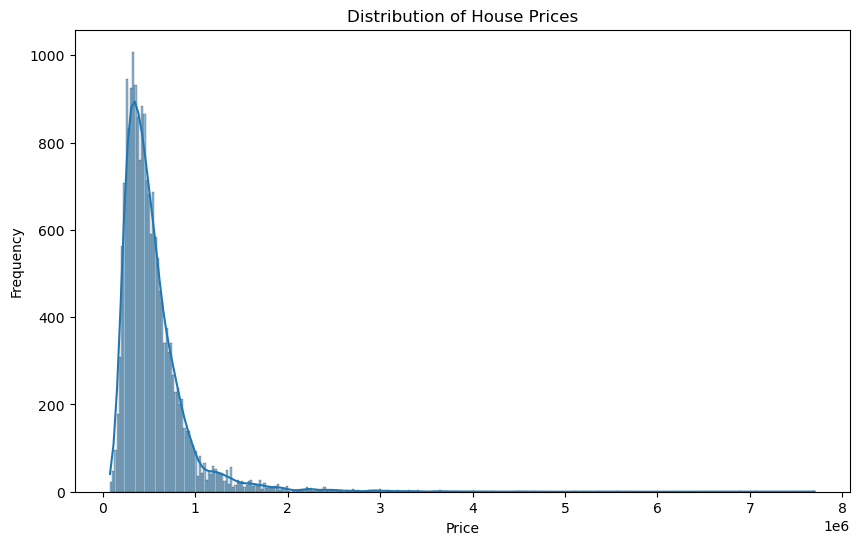

In [10]:
# Distribution of house prices by frequency
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution of house prices is positively-skewed, indicating that most houses are relatively inexpensive, while a small number of houses are very expensive. Most houses priced below $300,000 and $700,000.

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>]], dtype=object)

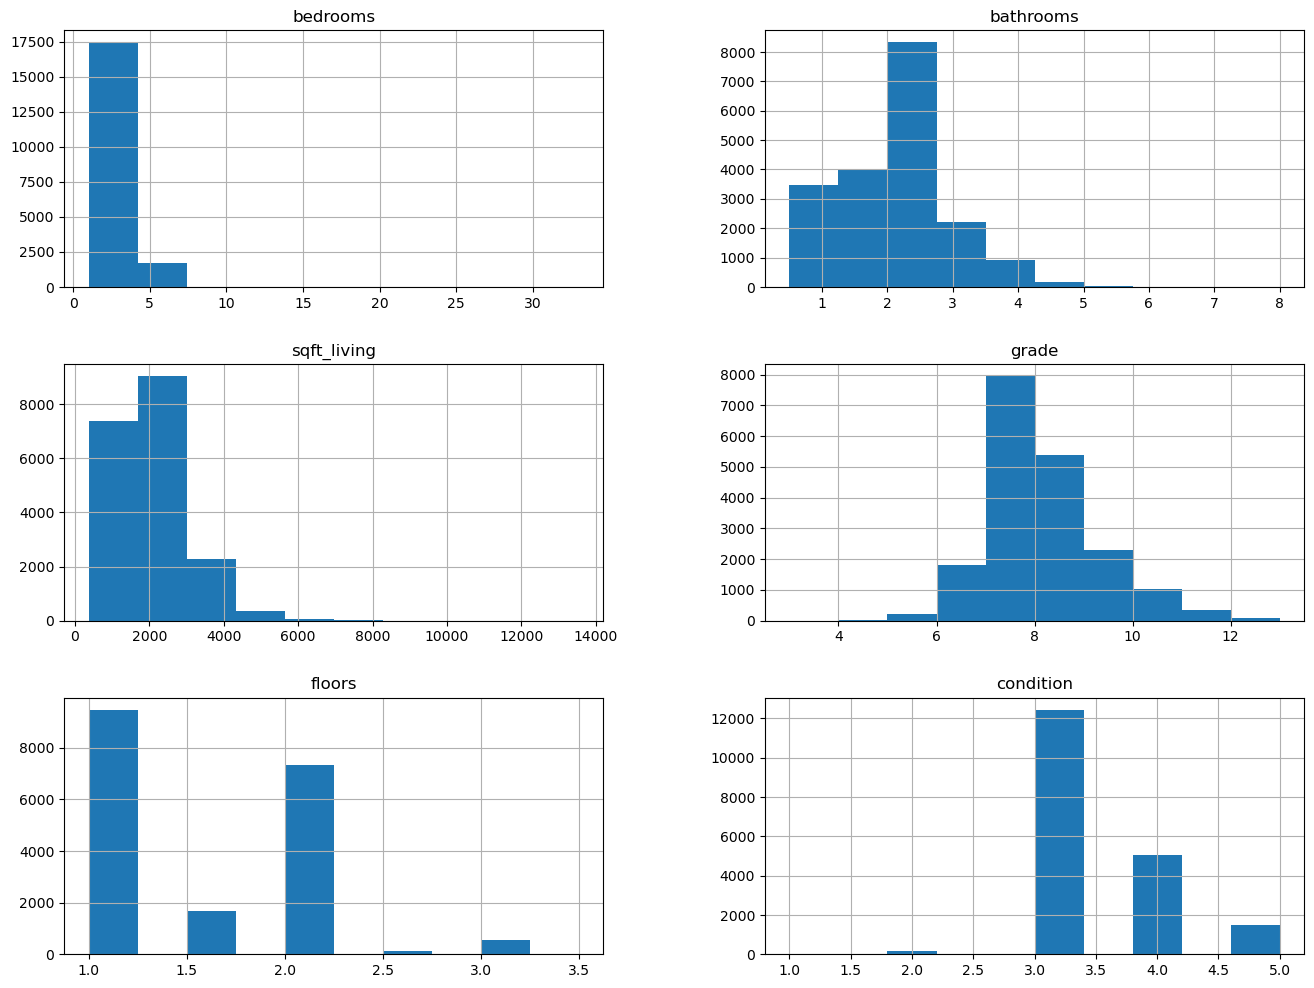

In [11]:
# Data distribution
hist_df = data_cleaned[['bedrooms', 'bathrooms', 'sqft_living','grade', 'floors', 'condition']]
hist_df.hist(figsize=(16, 12))

Box Plots 

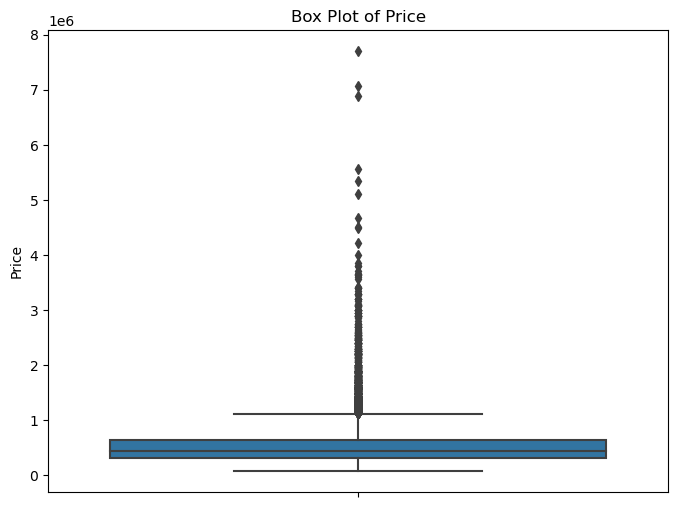

In [12]:
# Checking for outliers in the price variable
plt.figure(figsize=(8, 6))
sns.boxplot(y=data_cleaned['price'])
plt.ylabel("Price")
plt.title('Box Plot of Price')
plt.show()

Based on the box plot, there are outliers present, but we chose to retain them, assuming they accurately reflect the real-world dataset.

In [13]:
# Summary statistics
data_cleaned.describe()

,id,price,view,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.916400e+04,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000
mean,4.594087e+09,5.414490e+05,0.231058,3.374452,2.117029,2082.038301,1.506174e+04,1.495173,0.007566,3.409987,7.660718,1971.039553
std,2.876912e+09,3.709009e+05,0.763368,0.928676,0.769241,921.918226,4.077215e+04,0.540308,0.086657,0.650456,1.175601,29.388020
min,1.000102e+06,7.800000e+04,0.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.124077e+09,3.220000e+05,0.000000,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.905082e+09,4.500000e+05,0.000000,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.334501e+09,6.439625e+05,0.000000,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,4.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


This gives us a comprehensive overview of our data. Some key points include:

- Home prices range from 78,000 USD and 7,700,000 USD
- Most homes are priced at arond 600,000.
- The average home has 3 bedrooms and 2 bathrooms, with approximately 2,080 square feet of living space.
- Most are quite new as they were built in 2015
- We observed a listing for a home with 33 bedrooms. This might be an extreme outlier or a data entry error.

Box Plots

# Bi-Variate Analysis

Checking for relationship between price and other variables

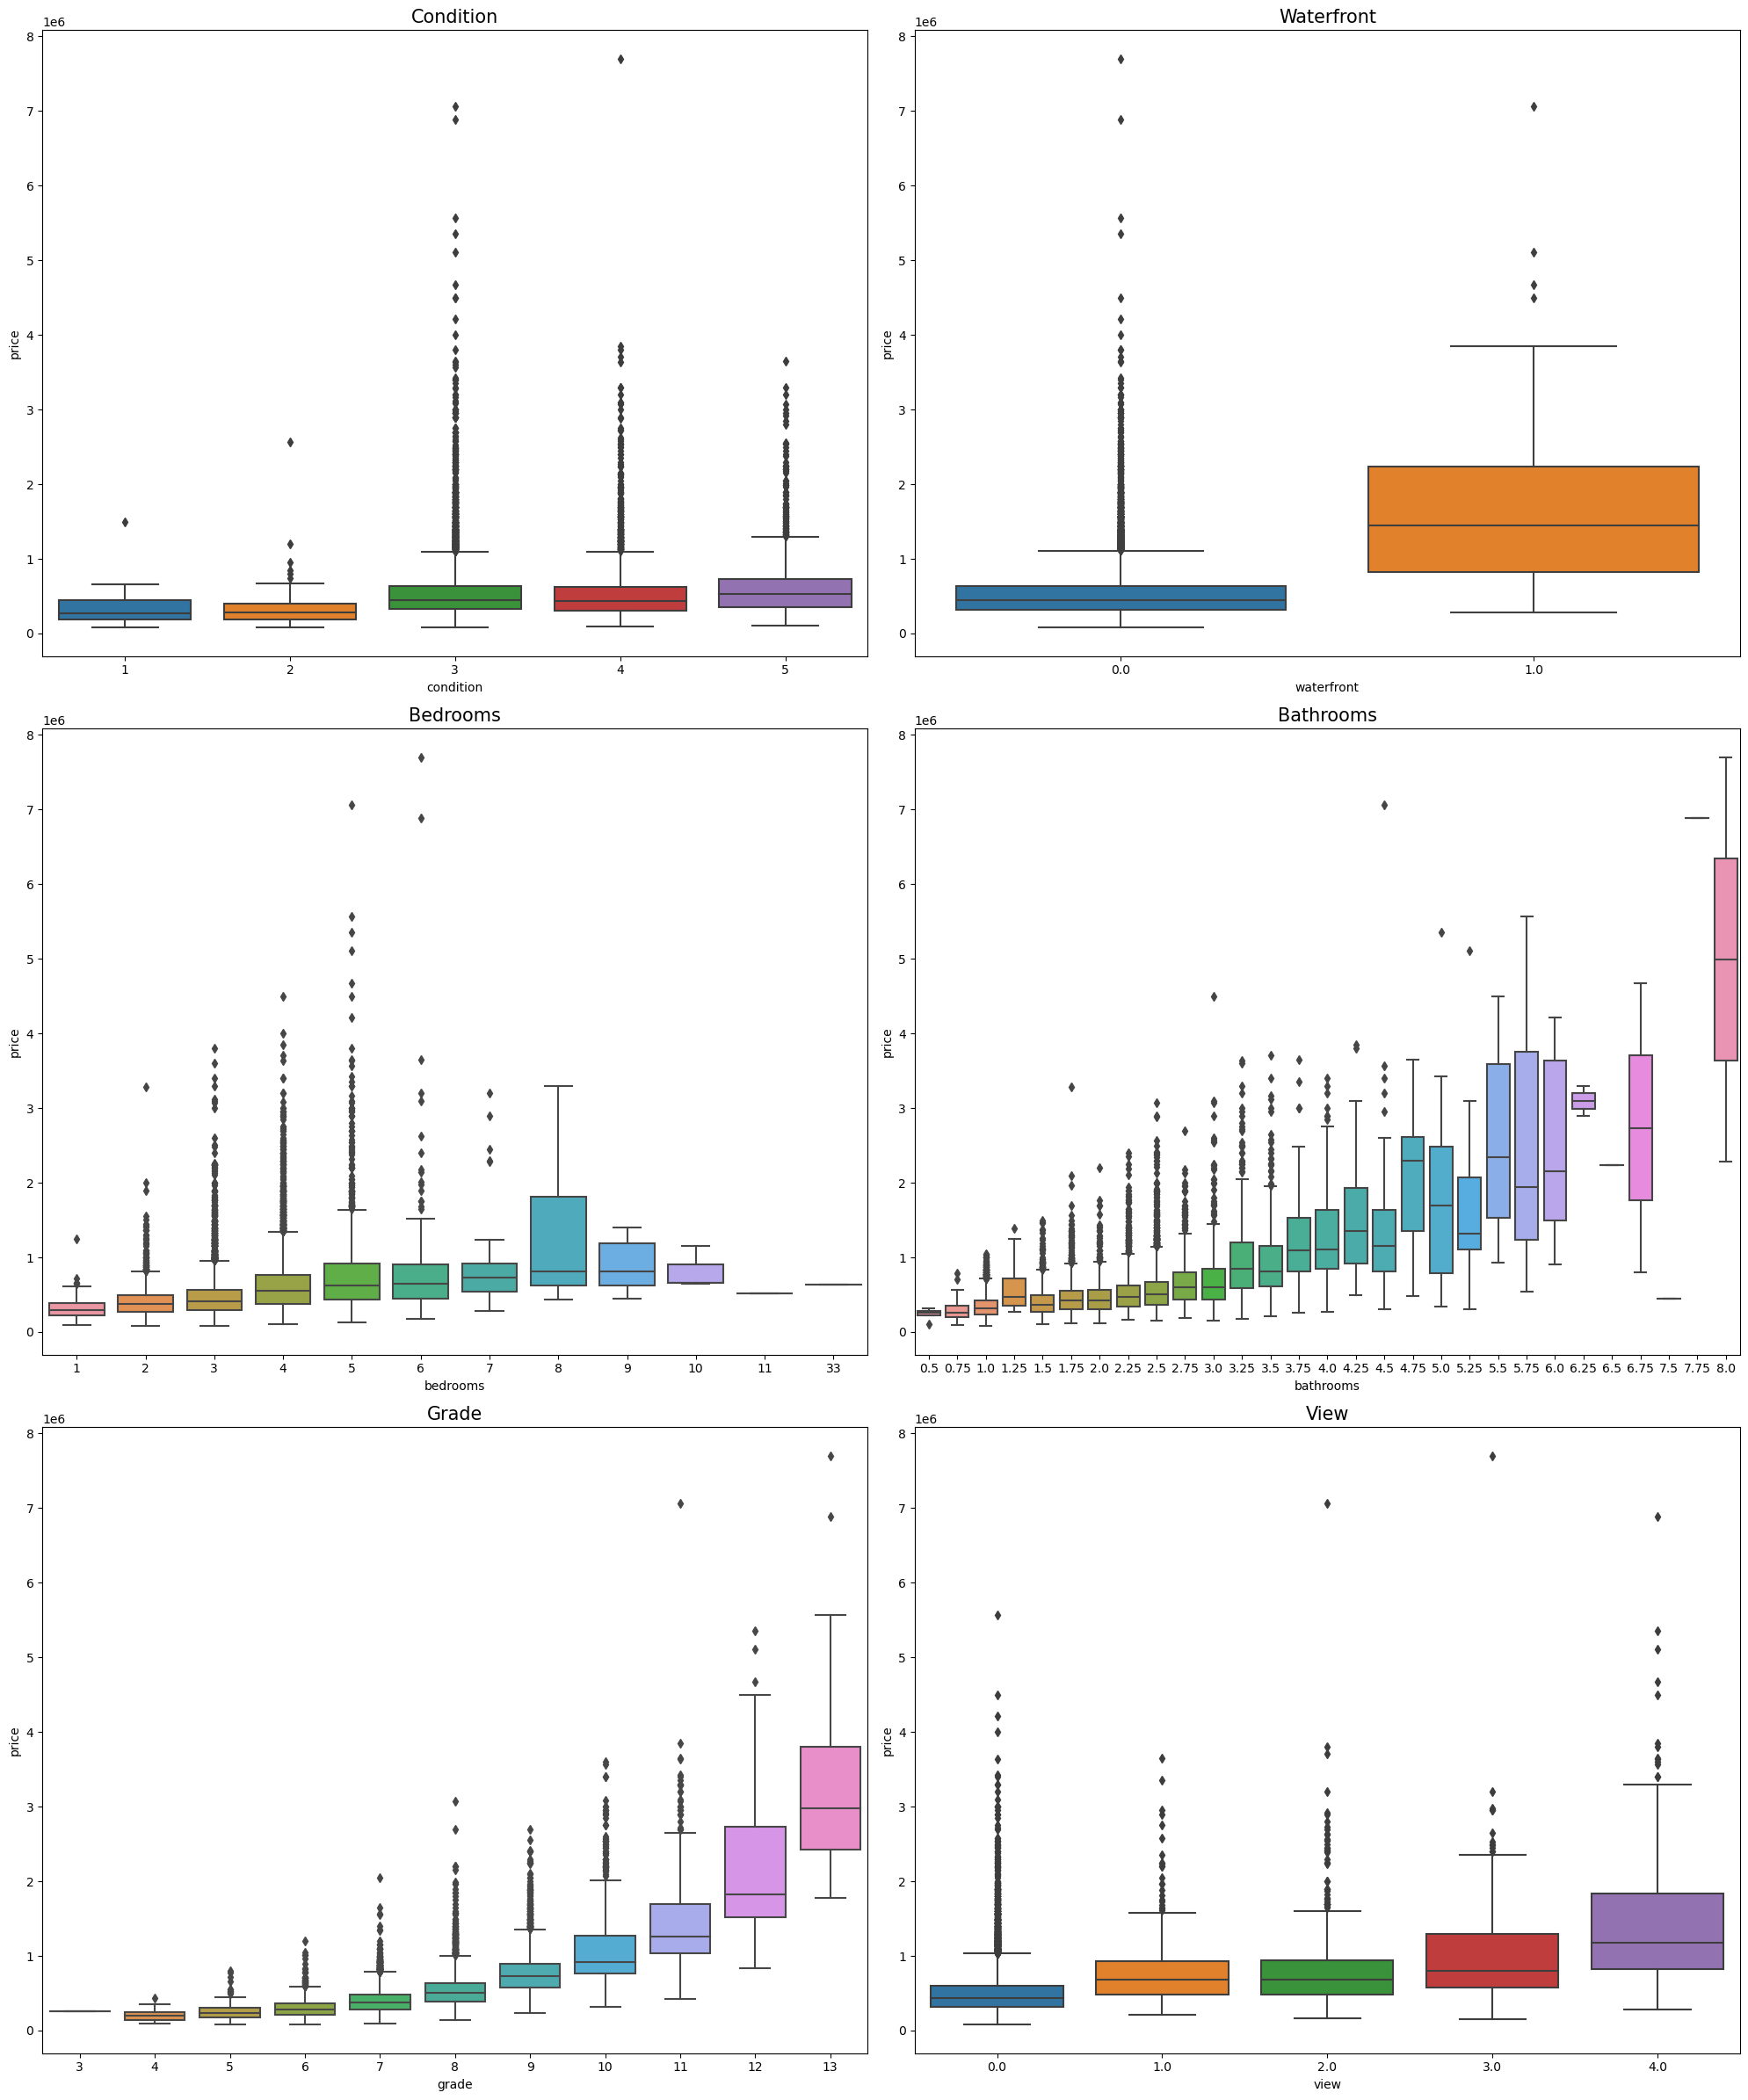

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 24))

# Subplot 1: Box plot for 'condition'
sns.boxplot(x="condition", y="price", data=data_cleaned, ax=axes[0, 0])
axes[0, 0].set_title("Condition", fontsize=15)

# Subplot 2: Box plot for 'waterfront'
sns.boxplot(x="waterfront", y="price", data=data_cleaned, ax=axes[0, 1])
axes[0, 1].set_title("Waterfront", fontsize=15)

# Subplot 3: Box plot for 'bedrooms'
sns.boxplot(x="bedrooms", y="price", data=data_cleaned, ax=axes[1, 0])
axes[1, 0].set_title("Bedrooms", fontsize=15)

# Subplot 4: Box plot for 'bathrooms'
sns.boxplot(x="bathrooms", y="price", data=data_cleaned, ax=axes[1, 1])
axes[1, 1].set_title("Bathrooms", fontsize=15)

# Subplot 5: Box plot for 'grade'
sns.boxplot(x="grade", y="price", data=data_cleaned, ax=axes[2, 0])
axes[2, 0].set_title("Grade", fontsize=15)

# Subplot 6: Box plot for 'view'
sns.boxplot(x="view", y="price", data=data_cleaned, ax=axes[2, 1])
axes[2, 1].set_title("View", fontsize=15)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

Observations
1. Condition Impact: Improving property condition can lead to increased market value and potentially faster sales.
2. Features such as waterfront views significantly enhance property value. Properties with these features can be marketed at higher price points.
3.  Larger properties (more bedrooms and bathrooms) generally command higher prices, reflecting increased space and functionality.
4.  The higher the grade of a house, the higher its price is estimated.
5.  Better views lead to higher prices
6.  More bathrooms equals higher prices

Checking Corelations

Pearson correlation coefficient and P-value

* if coefficient value == 1: perfect positive linear correlation
* if coefficient value == 0: nonlinear correlation
* if coefficient value == -1: perfect negative linear correlation
<br>

In [15]:
print(data.columns)


Index(['id', 'price', 'view', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')


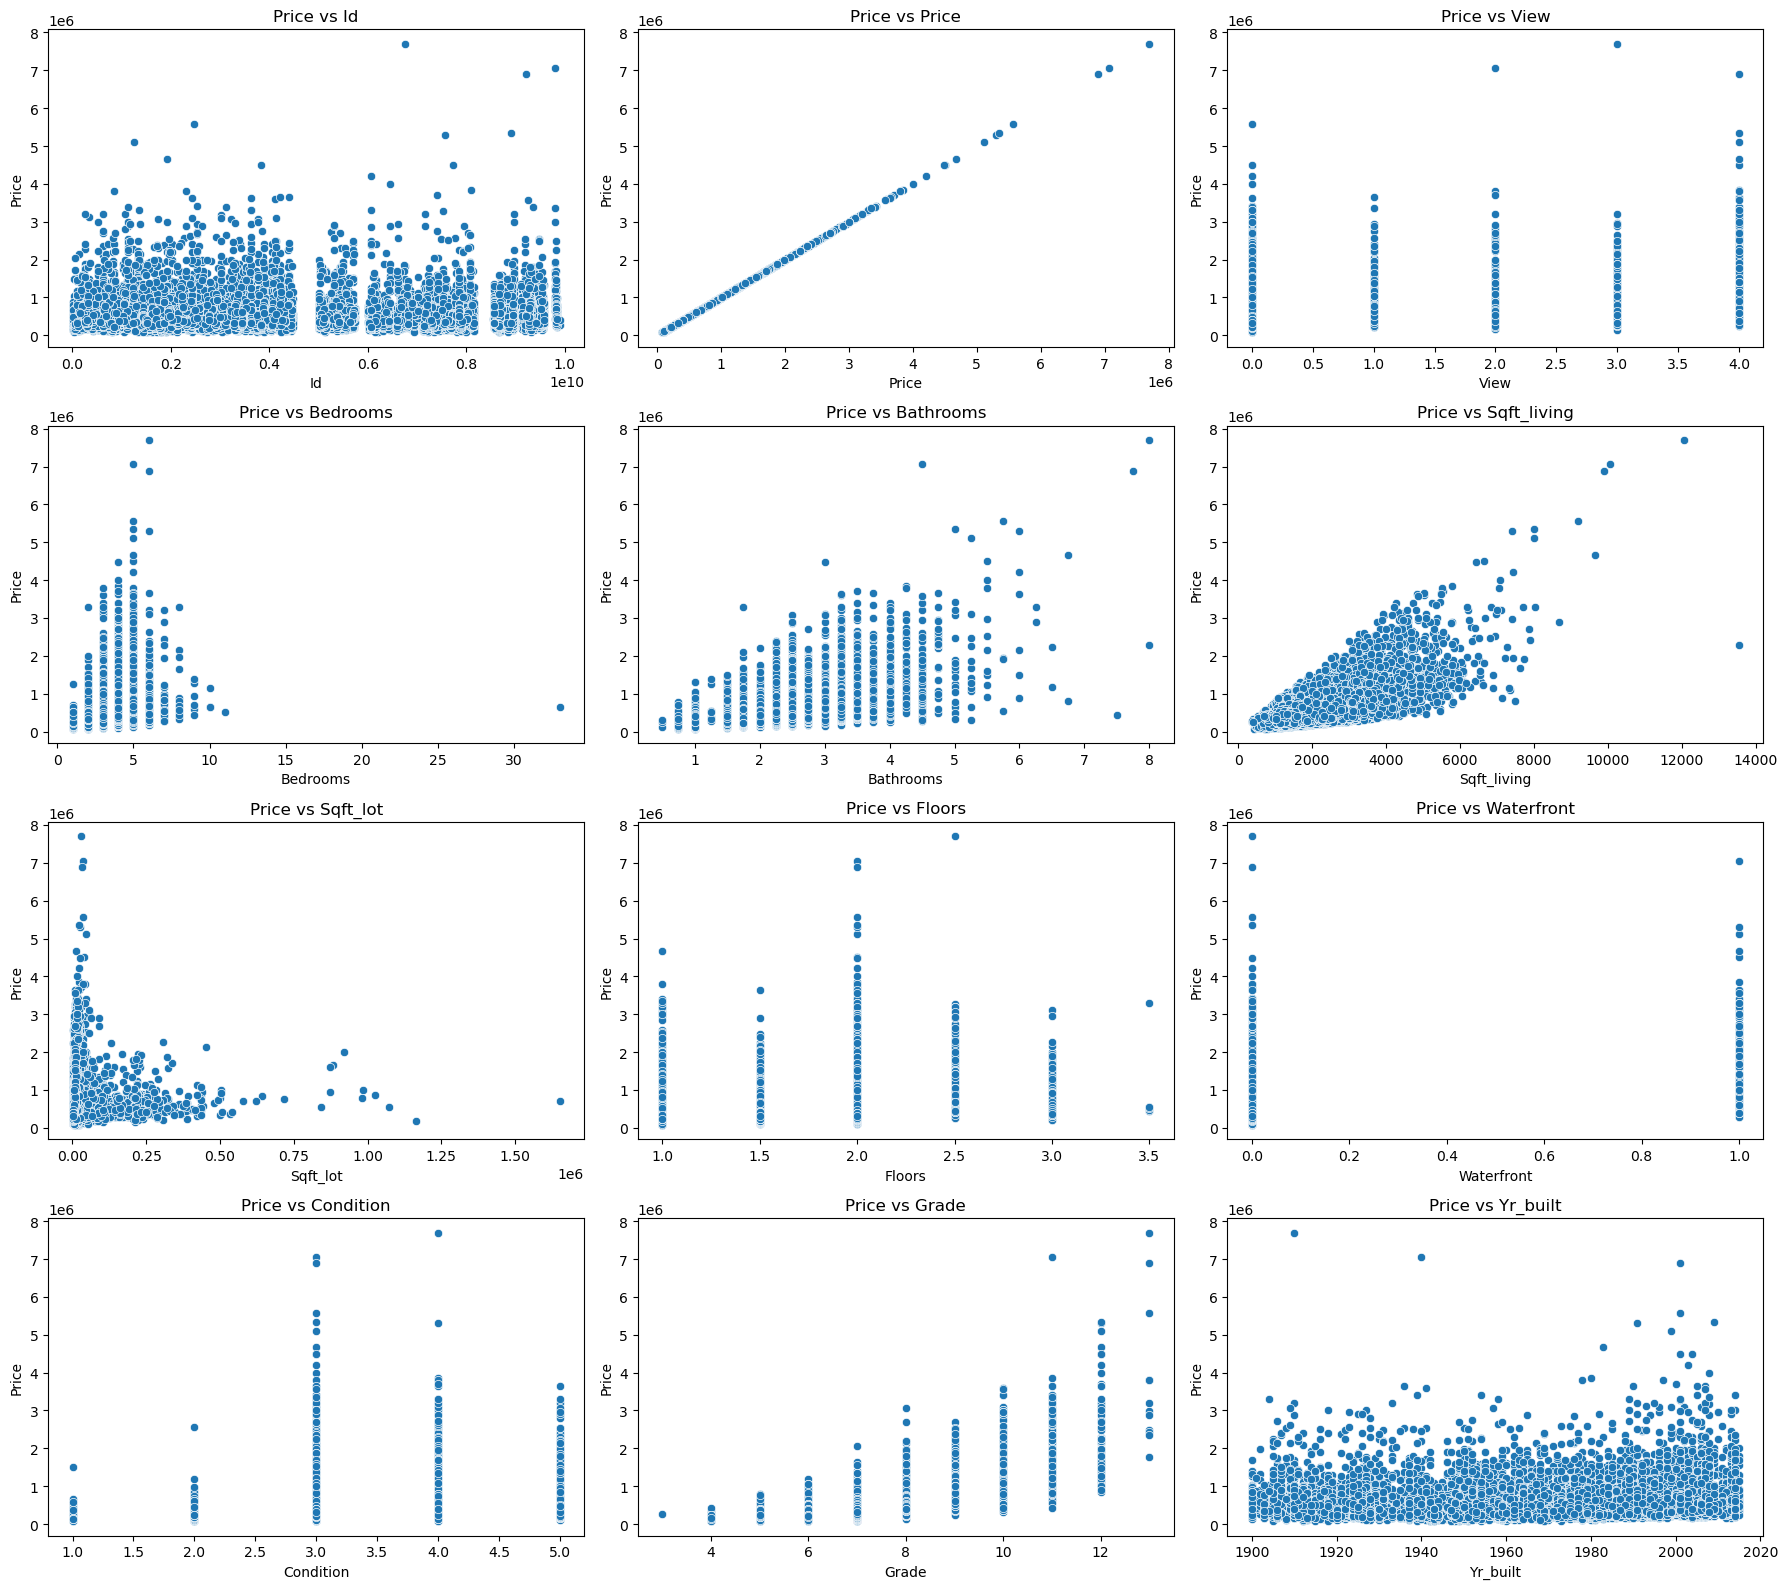

In [16]:
# Define the target variable and features to plot against
target = 'price'
features_to_plot = [
    'id', 'price', 'view', 'bedrooms', 'bathrooms', 
    'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
    'condition', 'grade', 'yr_built']

# Create scatterplots
num_features = len(features_to_plot)
num_rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)

plt.figure(figsize=(18, 4 * num_rows))

for i, feature in enumerate(features_to_plot):
    plt.subplot(num_rows, 3, i+1)
    sns.scatterplot(x=feature, y=target, data=data)
    plt.title(f'Price vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [17]:
# Calculating the correlation matrix

corr_matrix = data_cleaned.corr()
corr_matrix

,id,price,view,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.000000,-0.018107,0.014630,0.003630,0.006942,-0.012064,-0.133577,0.018187,-0.004872,-0.022396,0.007842,0.023100
price,-0.018107,1.000000,0.395766,0.309057,0.526609,0.704428,0.087430,0.258797,0.270982,0.037514,0.667719,0.053433
view,0.014630,0.395766,1.000000,0.083542,0.186980,0.285976,0.071064,0.029147,0.406654,0.047143,0.248898,-0.055862
bedrooms,0.003630,0.309057,0.083542,1.000000,0.516137,0.577972,0.029685,0.181909,-0.004082,0.025047,0.359619,0.157011
bathrooms,0.006942,0.526609,0.186980,0.516137,1.000000,0.755909,0.085666,0.506058,0.064608,-0.126612,0.666475,0.507069
sqft_living,-0.012064,0.704428,0.285976,0.577972,0.755909,1.000000,0.173624,0.356938,0.107416,-0.057704,0.763701,0.317123
sqft_lot,-0.133577,0.087430,0.071064,0.029685,0.085666,0.173624,1.000000,-0.007519,0.023164,-0.013656,0.114968,0.055560
floors,0.018187,0.258797,0.029147,0.181909,0.506058,0.356938,-0.007519,1.000000,0.021399,-0.263421,0.458230,0.490251
waterfront,-0.004872,0.270982,0.406654,-0.004082,0.064608,0.107416,0.023164,0.021399,1.000000,0.017175,0.085644,-0.026612
condition,-0.022396,0.037514,0.047143,0.025047,-0.126612,-0.057704,-0.013656,-0.263421,0.017175,1.000000,-0.144898,-0.361988


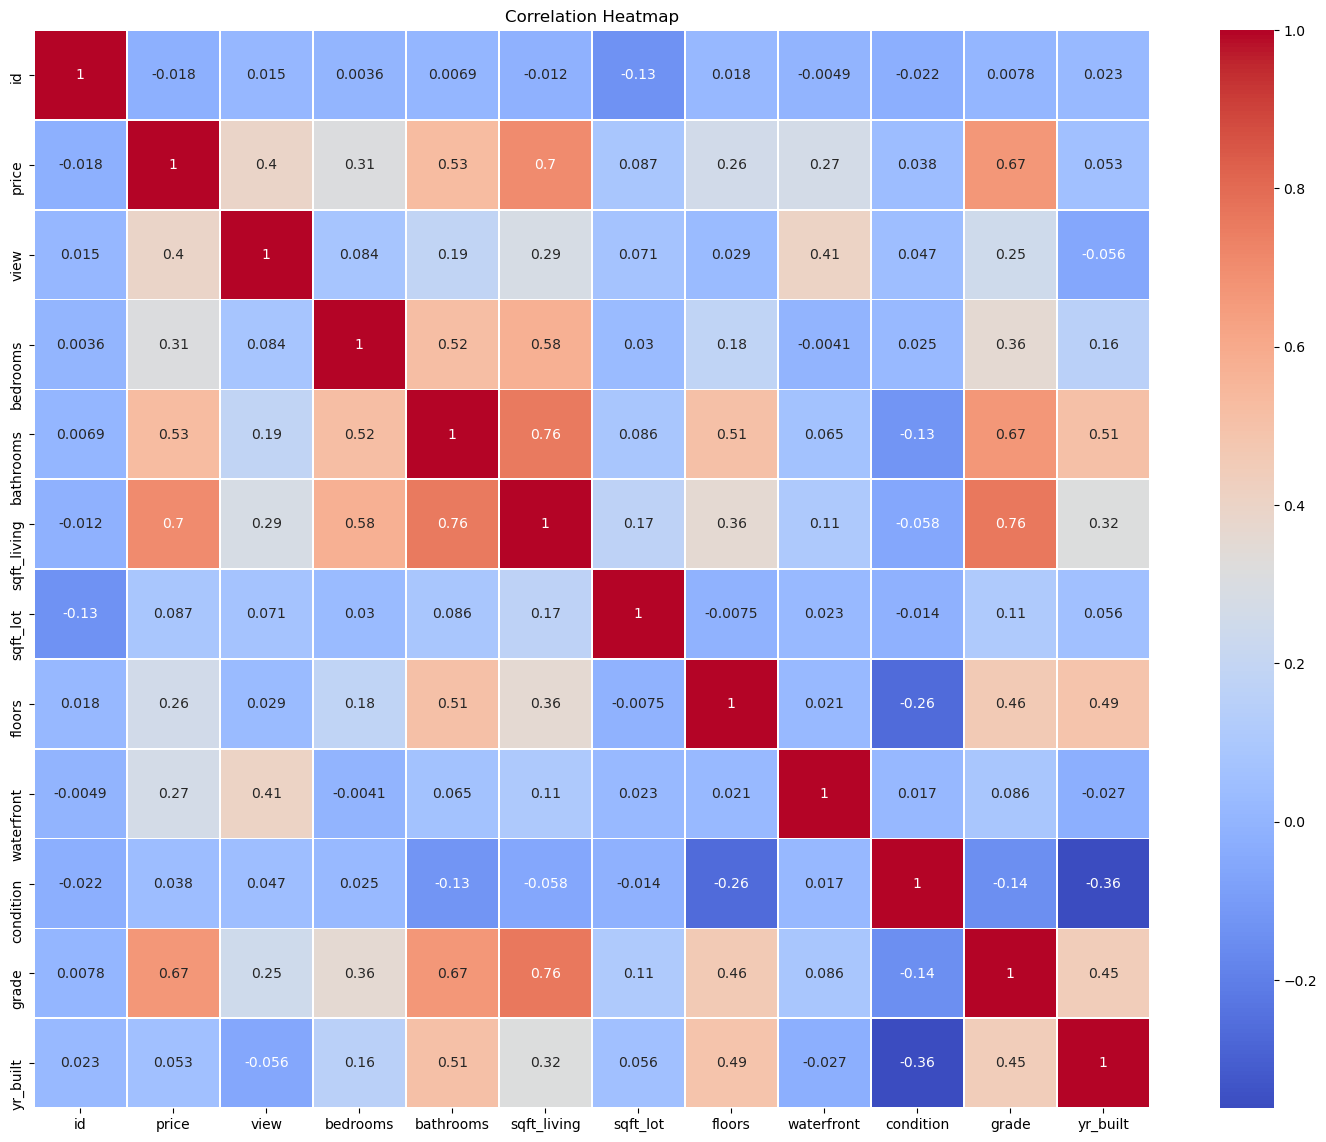

In [18]:
# plotting the heatmap 
# Correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

sqft_living has a strong positive correlation with price (0.70).
grade also shows a strong positive correlation with price (0.67).
sqft_above and bathrooms have moderate positive correlations with price (0.61 and 0.53 respectively).
sqft_living15 has a positive correlation (0.59).

In [19]:
# Define predictors and target variable
X = data_cleaned[['view', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']]
y = data_cleaned['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('R^2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R^2 Score: 0.6537752929488448
Mean Squared Error: 52209613358.540375
Mean Absolute Error: 141610.85618215648


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  